<a href="https://colab.research.google.com/github/Tansiv/ML-CSE475/blob/main/Random_forest_and_decision_tree_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# Import necessary !pips
!pip install fpdf

!pip install fpdf matplotlib seaborn
!pip install python-docx


In [80]:
# Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from docx import Document
from docx.shared import Inches


In [75]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
# Load Dataset
# Replace with your dataset path in Google Drive or local storage
dataset_path = '/content/drive/MyDrive/ML-LAB/LAB-1/MangoLeafBD Dataset'

# Initialize lists for images and labels
images = []
labels = []

# Load images and labels from each class folder
for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (128, 128))  # Resize to consistent dimensions
            images.append(image)
            labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# **Exploratory Data Analysis (EDA) on the dataset**

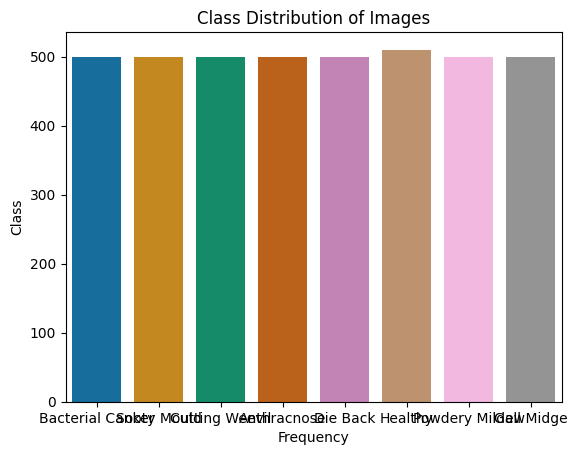

In [97]:
# List of color palettes to choose from
palettes = ["pastel", "bright", "dark", "colorblind", "muted", "Set2", "Set3"]

# Randomly select a palette
random_palette = random.choice(palettes)

# Plot class distribution with a randomly selected color palette
sns.countplot(x=labels, hue=labels, palette=random_palette, dodge=False, legend=False)
plt.title("Class Distribution of Images")
plt.xlabel("Frequency")
plt.ylabel("Class")
plt.show()


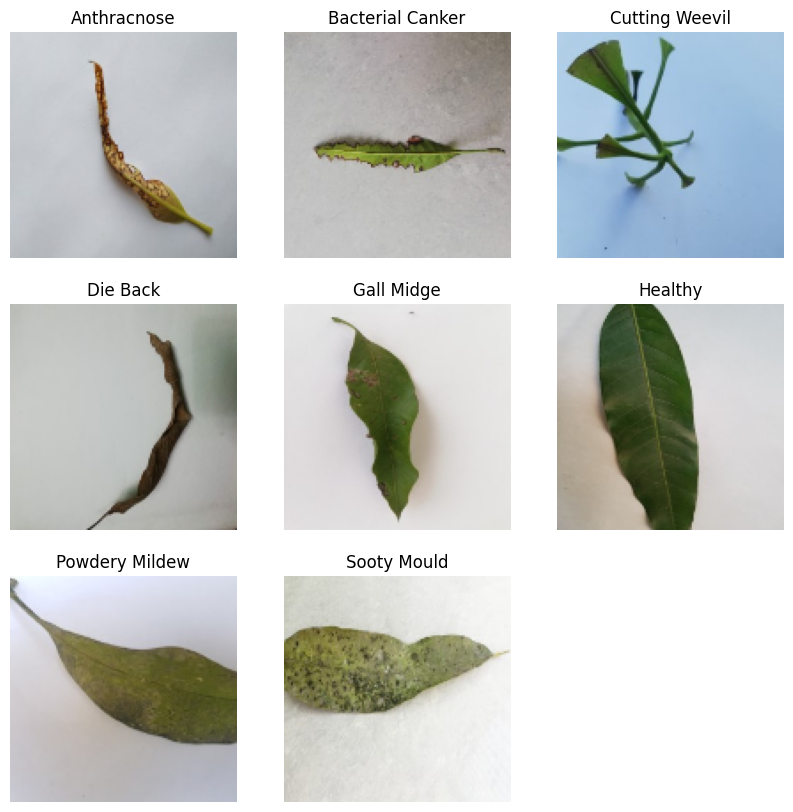

In [102]:
# 2. Display Sample Images
# Display one random image per class
unique_labels = np.unique(labels)
plt.figure(figsize=(10, 10))
for i, label in enumerate(unique_labels):
    label_indices = np.where(labels == label)[0]
    random_index = np.random.choice(label_indices)
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[random_index], cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')
sample_images_path = "/content/sample_images_grid.png"
plt.savefig(sample_images_path)  # Save sample images grid for the report
plt.show()


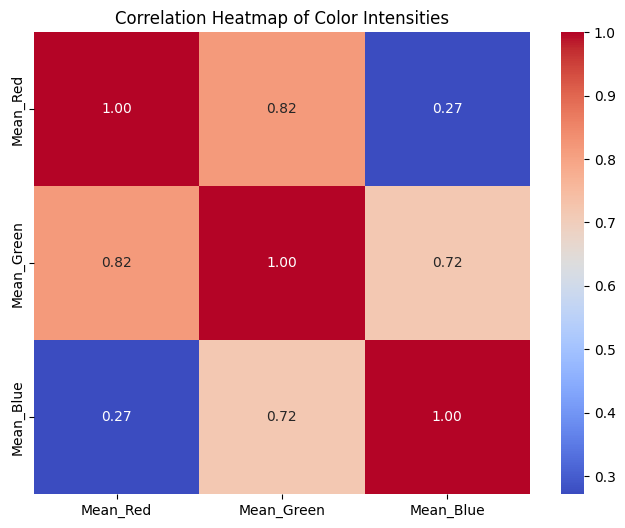

In [92]:
# Calculate mean color intensities for each image
mean_red = [np.mean(img[:, :, 2]) for img in images]   # Red channel
mean_green = [np.mean(img[:, :, 1]) for img in images]  # Green channel
mean_blue = [np.mean(img[:, :, 0]) for img in images]   # Blue channel

# Create a DataFrame for correlation analysis
color_intensity_df = pd.DataFrame({
    'Mean_Red': mean_red,
    'Mean_Green': mean_green,
    'Mean_Blue': mean_blue
})

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(color_intensity_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Color Intensities")
plt.show()



In [103]:
# Encode labels for model training
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Flatten images and split into training and testing sets
images_flattened = images.reshape(images.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels_encoded, test_size=0.2, random_state=42)




In [ ]:
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:")
print(dt_report)

In [105]:
# Model Training and Evaluation
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:")
print(dt_report)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(rf_report)


Decision Tree Accuracy: 0.6982543640897756
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       103
           1       0.83      0.74      0.78       123
           2       0.93      0.98      0.95       103
           3       0.78      0.80      0.79       100
           4       0.54      0.59      0.56        94
           5       0.62      0.71      0.66        89
           6       0.60      0.61      0.60       102
           7       0.48      0.48      0.48        88

    accuracy                           0.70       802
   macro avg       0.69      0.69      0.69       802
weighted avg       0.70      0.70      0.70       802

Random Forest Accuracy: 0.8802992518703242
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       103
           1       0.90      0.87      0.88       123
           2       0.99   

In [106]:
# Create Word Report
doc = Document()
doc.add_heading('Image Classification Report', 0)

# Add EDA Section
doc.add_heading('Exploratory Data Analysis (EDA)', level=1)

# Add Class Distribution Plot to Word
doc.add_heading('Class Distribution', level=2)
doc.add_paragraph("This plot shows the number of images in each class to identify any class imbalances.")
doc.add_picture(class_distribution_path, width=Inches(5.5))

# Add Sample Images to Word
doc.add_heading('Sample Images by Class', level=2)
doc.add_paragraph("Randomly selected sample images from each class.")
doc.add_picture(sample_images_path, width=Inches(5.5))

# Add Model Performance Section
doc.add_heading('Model Performance', level=1)

# Decision Tree Results
doc.add_heading('Decision Tree Model Results', level=2)
doc.add_paragraph(f"Test Accuracy: {dt_accuracy:.2f}")
doc.add_paragraph("Classification Report:")
dt_report_dict = classification_report(y_test, y_pred_dt, output_dict=True)

# Create table for Decision Tree classification report
table = doc.add_table(rows=1, cols=5)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Class'
hdr_cells[1].text = 'Precision'
hdr_cells[2].text = 'Recall'
hdr_cells[3].text = 'F1-Score'
hdr_cells[4].text = 'Support'

for class_label, metrics in dt_report_dict.items():
    if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
        row_cells = table.add_row().cells
        row_cells[0].text = str(class_label)
        row_cells[1].text = f"{metrics['precision']:.2f}"
        row_cells[2].text = f"{metrics['recall']:.2f}"
        row_cells[3].text = f"{metrics['f1-score']:.2f}"
        row_cells[4].text = str(int(metrics['support']))

# Random Forest Results
doc.add_heading('Random Forest Model Results', level=2)
doc.add_paragraph(f"Test Accuracy: {rf_accuracy:.2f}")
doc.add_paragraph("Classification Report:")
rf_report_dict = classification_report(y_test, y_pred_rf, output_dict=True)

# Create table for Random Forest classification report
table = doc.add_table(rows=1, cols=5)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Class'
hdr_cells[1].text = 'Precision'
hdr_cells[2].text = 'Recall'
hdr_cells[3].text = 'F1-Score'
hdr_cells[4].text = 'Support'

for class_label, metrics in rf_report_dict.items():
    if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
        row_cells = table.add_row().cells
        row_cells[0].text = str(class_label)
        row_cells[1].text = f"{metrics['precision']:.2f}"
        row_cells[2].text = f"{metrics['recall']:.2f}"
        row_cells[3].text = f"{metrics['f1-score']:.2f}"
        row_cells[4].text = str(int(metrics['support']))

# Summary Section
doc.add_heading('Summary', level=1)
doc.add_paragraph("In this experiment, both Decision Tree and Random Forest models were used to classify images.")
doc.add_paragraph(f"Random Forest achieved a test accuracy of {rf_accuracy:.2f}, which was higher than the Decision Tree's accuracy of {dt_accuracy:.2f}.")
doc.add_paragraph("The dataset was balanced, so no data augmentation was necessary. The model results indicate that Random Forest performed better for this classification task.")


In [107]:

# Save and Download Word Report
docx_file_path = "/content/image_classification_report.docx"
doc.save(docx_file_path)
from google.colab import files
files.download(docx_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>